In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import sklearn

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/Users/fanggot/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from sklearn.model_selection import KFold

In [4]:
boston_data = load_boston()

In [5]:
boston_data.data.shape

(506, 13)

In [6]:
boston_df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

In [7]:
boston_df['const'] = np.ones_like(boston_df['RM'])

In [8]:
boston_df_target = pd.Series(boston_data.target)

In [9]:
boston_df.shape

(506, 14)

In [10]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1.0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,1.0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,1.0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,1.0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,1.0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,1.0


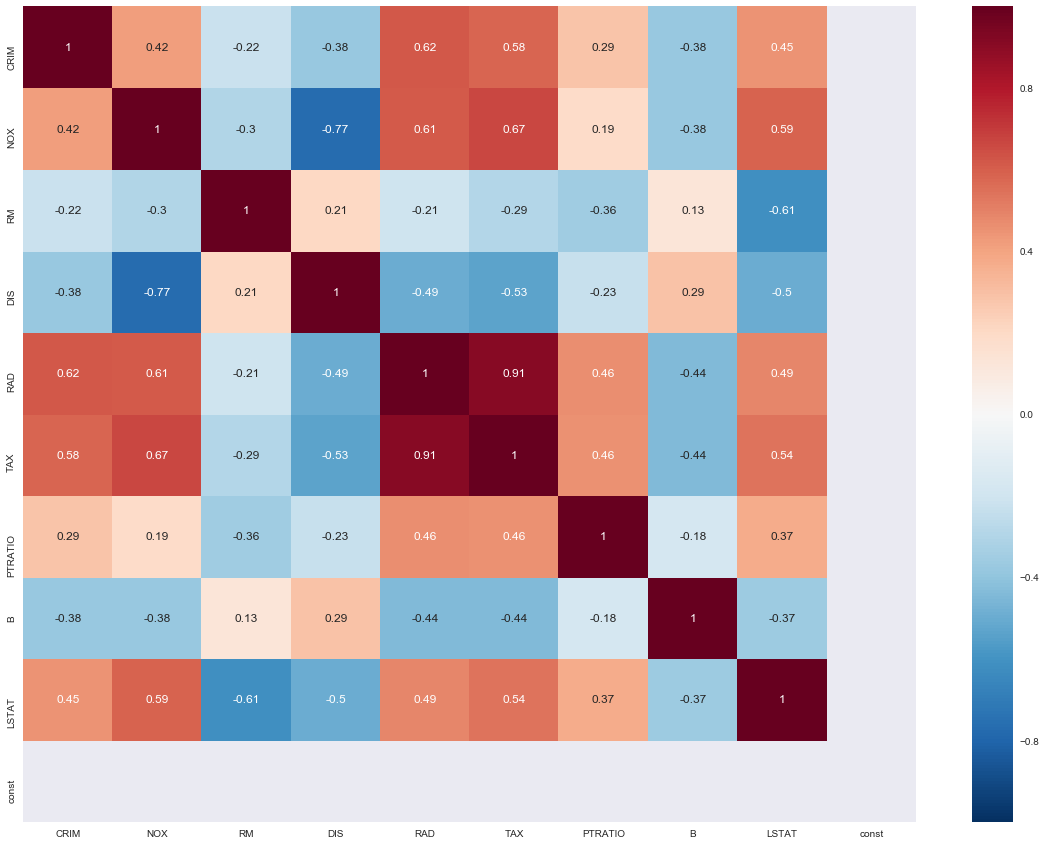

In [11]:
cols = ['CRIM','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT','const']
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(boston_df[cols].corr(), annot=True)
show()

In [12]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,1.0
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,0.0
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,1.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,1.0
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,1.0
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,1.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,1.0


In [13]:
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,1.0


In [14]:
from scipy.stats import boxcox

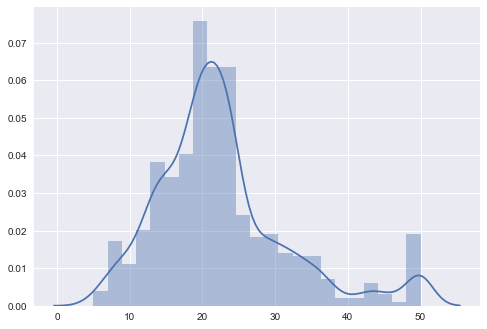

In [15]:
sns.distplot(boston_df_target)
show()

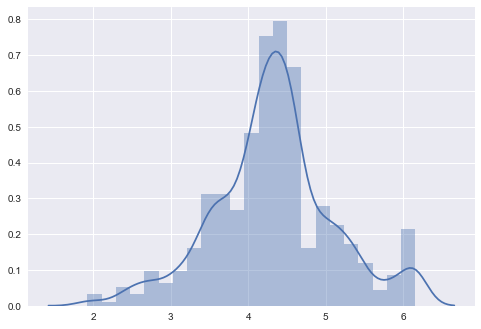

In [16]:
sns.distplot(boxcox(boston_df_target)[0])
show()

In [17]:
boston_df_target_n = pd.Series(boxcox(boston_df_target)[0])

In [18]:
# cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','const']
cols = ['CRIM','NOX','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT','const']
X_train, X_test, y_train, y_test = train_test_split(boston_df[cols], boston_df_target, test_size = .2)
model = sm.OLS(y_train, X_train)
res = model.fit()
print(res.summary())
print(sklearn.metrics.r2_score( y_test, res.predict(X_test) ))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     113.1
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          1.98e-103
Time:                        14:08:24   Log-Likelihood:                -1207.0
No. Observations:                 404   AIC:                             2434.
Df Residuals:                     394   BIC:                             2474.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1122      0.038     -2.942      0.0

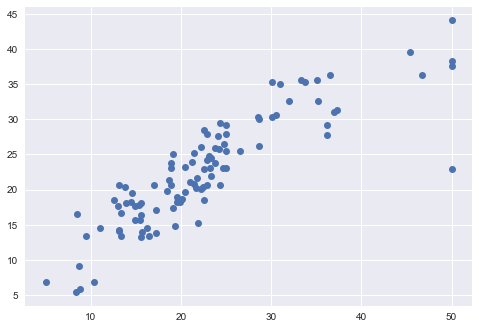

In [19]:
plt.plot(y_test, res.predict(X_test),'o')
show()

In [20]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(boston_df[cols], boston_df_target_n, test_size = .2)
model_n = sm.OLS(y_train_n, X_train_n)
res_n = model_n.fit()
print(res_n.summary())
print(sklearn.metrics.r2_score( y_test_n, res_n.predict(X_test_n) ))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          3.97e-134
Time:                        14:08:25   Log-Likelihood:                -148.89
No. Observations:                 404   AIC:                             317.8
Df Residuals:                     394   BIC:                             357.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0172      0.003     -6.709      0.0

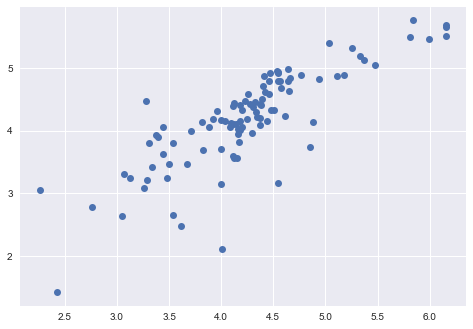

In [21]:
plt.plot(y_test_n, res_n.predict(X_test_n),'o')
show()

In [22]:
B = '(TAX = 17.62*RAD+240)'
res.f_test(B)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[39431.216887]]), p=0.0, df_denom=394, df_num=1>

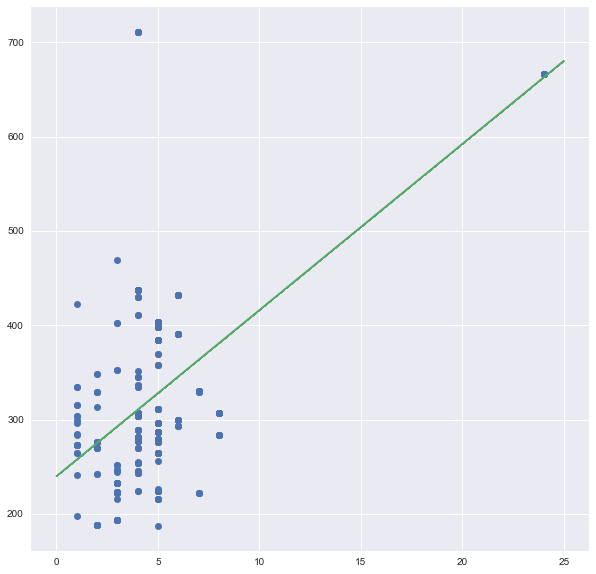

In [23]:
x_in = np.arange(0,25,.01)
y_in = x_in*17.62+240
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(boston_df['RAD'], boston_df['TAX'], 'o')
ax.plot(x_in, y_in, marker='o', markersize=1 )
show()

In [24]:
np.corrcoef(boston_df['RAD'], boston_df['TAX'])

array([[1.        , 0.91022819],
       [0.91022819, 1.        ]])

In [25]:
np.polyfit(boston_df['RAD'], boston_df['TAX'], deg=1)

array([ 17.61831445, 239.99269677])

In [26]:
model_1 = sm.OLS(boston_df['RAD'],boston_df['TAX'])

In [27]:
res_1 = model_1.fit()

In [28]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RAD   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     2674.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):          7.06e-204
Time:                        14:08:25   Log-Likelihood:                -1547.2
No. Observations:                 506   AIC:                             3096.
Df Residuals:                     505   BIC:                             3101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TAX            0.0268      0.001     51.708      0.000       0.026       0.028
==============================================================================
Omnibus:                       39.584   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.967
Skew:                           0.412   Prob(JB):                     3.79e-06
Kurtosis:                       2.289   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
boston_df[boston_df['RAD'] == 4].shape

(110, 14)

In [30]:
from sklearn.cross_validation import KFold
from sklearn.model_selection import LeaveOneOut

/Users/fanggot/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
loo = LeaveOneOut()
loo.get_n_splits(boston_df[cols])

506

In [32]:
scores = []
x_test = []
y_test = []
for train_index, test_index in loo.split(boston_df[cols]):
    sk_model = LinearRegression()
    sk_res = sk_model.fit(boston_df.loc[train_index,cols], boston_df_target_n[train_index])
#     print(sk_res.predict(boston_df.loc[test_index, cols]), boston_df_target_n[test_index].values)
    scores.append(sk_res.predict(boston_df.loc[test_index, cols])[0] - boston_df_target_n[test_index].values[0])
    x_test.append(boston_df_target_n[test_index].values[0])
    y_test.append(sk_res.predict(boston_df.loc[test_index, cols])[0])

In [33]:
np.array(scores).mean()

-0.0015479596272473873

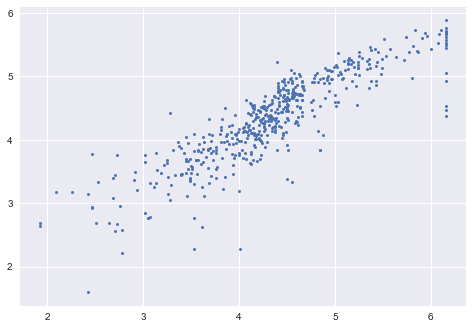

In [34]:
plt.plot(x_test, y_test,'o', markersize=3)
show()

In [35]:
sklearn.metrics.r2_score(x_test, y_test)

0.7661951519384198

0.7741627818257529
0.7476449673311838
0.7887769055095566
0.7342394981142839
0.7836505388799693


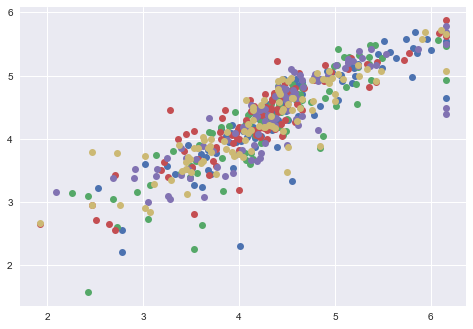

In [66]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(boston_df[cols])
scores = []
for train_index, test_index in kf.split(boston_df[cols]):
    sk_model = LinearRegression()
    sk_res = sk_model.fit(boston_df.loc[train_index,cols], boston_df_target_n[train_index])
    plt.plot(boston_df_target_n[test_index].values, sk_res.predict(boston_df.loc[test_index, cols]), 'o')
    print(sklearn.metrics.r2_score(boston_df_target_n[test_index].values, sk_res.predict(boston_df.loc[test_index, cols])))
#     scores.append(sk_res.predict(boston_df.loc[test_index, cols]), boston_df_target_n[test_index].values)
show()